- Simulações em Redes: Modelar processos dinâmicos como a propagação de informações ou doenças.
- Algoritmos de Fluxo Máximo: Resolver problemas de fluxo máximo para entender a capacidade de transporte em redes.
- Redes Direcionadas Ponderadas: Usar redes complexas para simular cenários realistas.
- Integração com Pandas: Manipular dados de rede com DataFrame para análises avançadas.

### Etapas
- Simulações em Redes: Utilizamos um modelo de rede pequeno-mundo para simular a propagação de uma doença, mostrando como diferentes nós são infectados ao longo do tempo.
- Algoritmos de Fluxo Máximo: Implementamos um grafo direcionado com capacidades para resolver um problema de fluxo máximo, que é fundamental para entender o potencial de fluxo em redes de transporte ou comunicação.
- Redes Direcionadas Ponderadas: Demonstramos o uso de grafos direcionados ponderados para representar e analisar situações que envolvem pesos variáveis, como custos ou distâncias.
- Integração com Pandas: Convertendo dados de rede para um DataFrame do Pandas, facilitando a manipulação e análise dos dados de rede usando ferramentas de dados robustas.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 1. Simulações em Redes
# Criando um grafo para simulação de propagação (ex: doenças)
S = nx.watts_strogatz_graph(30, 3, 0.1)

# Simulando a propagação de uma "doença"
infected = np.random.choice(S.nodes(), size=5, replace=False)  # Nós iniciais infectados
for step in range(5):  # Simula 5 "dias"
    new_infected = []
    for node in infected:
        neighbors = list(S.neighbors(node))
        new_infected.extend(np.random.choice(neighbors, size=1, replace=False))
    infected = np.unique(new_infected)
    print(f"Dia {step + 1}: Nós infectados {infected}")

Dia 1: Nós infectados [11 15 24 25 26]
Dia 2: Nós infectados [13 14 25 26 27]
Dia 3: Nós infectados [11 15 26 27]
Dia 4: Nós infectados [13 14 27 28]
Dia 5: Nós infectados [14 15 26 27]


In [3]:
# 2. Algoritmos de Fluxo Máximo
# Criando um grafo direcionado ponderado para fluxo máximo
F = nx.DiGraph()
F.add_edge('s', 'a', capacity=10)
F.add_edge('s', 'b', capacity=5)
F.add_edge('a', 'b', capacity=15)
F.add_edge('a', 't', capacity=10)
F.add_edge('b', 't', capacity=10)

# Calculando o fluxo máximo do ponto 's' (fonte) para 't' (sorvedouro)
flow_value, flow_dict = nx.maximum_flow(F, 's', 't')
print("Fluxo máximo:", flow_value)

Fluxo máximo: 15


In [4]:
# 3. Redes Direcionadas Ponderadas
# Usando um grafo direcionado para representar transporte ou comunicações
D = nx.DiGraph()
edges = [('X', 'Y', 5.5), ('Y', 'Z', 3.2), ('X', 'Z', 7.1)]
D.add_weighted_edges_from(edges)

  Source Target           Weight
0      X      Y  {'weight': 5.5}
1      X      Z  {'weight': 7.1}
2      Y      Z  {'weight': 3.2}


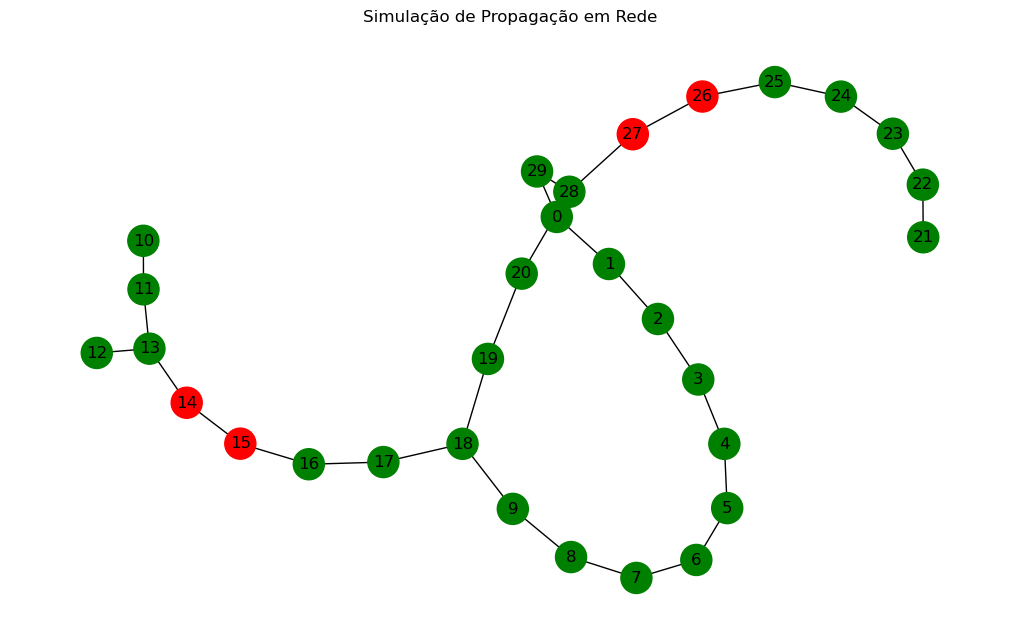

In [5]:
# 4. Integração com Pandas
# Exportando dados do grafo para DataFrame
df = pd.DataFrame(list(D.edges(data=True)), columns=['Source', 'Target', 'Weight'])
print(df)

# Visualização da simulação inicial
pos = nx.spring_layout(S)
plt.figure(figsize=(10, 6))
nx.draw(S, pos, node_color=['red' if node in infected else 'green' for node in S], with_labels=True, node_size=500)
plt.title("Simulação de Propagação em Rede")
plt.show()
